In [ ]:
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 


In [ ]:
# mount colab drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# add this notebook's folder path
folder_thisNotebook = 'Geospatial/Geospatial data science'
# This notebook's folder path
path_drive_folder_thisNotebook = 'drive/My Drive/Colab Notebooks/' + folder_thisNotebook

import os
os.chdir(path_drive_folder_thisNotebook)

cwd = os.getcwd()
cwd

Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/Geospatial/Geospatial data science'

In [ ]:
import matplotlib.pyplot as plt
import shapely

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
     |████████████████████████████████| 16.7 MB 268 kB/s 


## Read GeoJson created from RarePlanes data

In [ ]:
gdf_jacksonhole_airport = []
gdf_jacksonhole_airport = gpd.read_file('dataframe.geojson')

In [ ]:
gdf_jacksonhole_airport.head(1)

,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,num_tail_fins,...,length,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,geometry
0,103,104001004890F500,"Jackson Hole Airport, East Airport Road, Teton...",Medium Civil Transport/Utility,2,1,2,jet,no,1,...,19.381317,19.46882,188.658004,2,1,0,0.766088,1,144.528679,"POLYGON ((-110.73833 43.60129, -110.73822 43.6..."


In [ ]:
gdf_jacksonhole_airport['role_id']

0     2
1     2
2     2
3     2
4     2
     ..
88    2
89    2
90    1
91    2
92    2
Name: role_id, Length: 93, dtype: int64

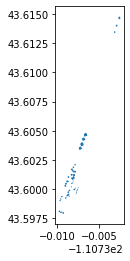

In [ ]:
gdf_jacksonhole_airport.plot()

In [ ]:
gdf_jacksonhole_airport['centroids'] = gdf_jacksonhole_airport.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
# image boundaries left, right, bottom, top
bbox = (-110.7745, -110.6797,  43.5902, 43.6286)

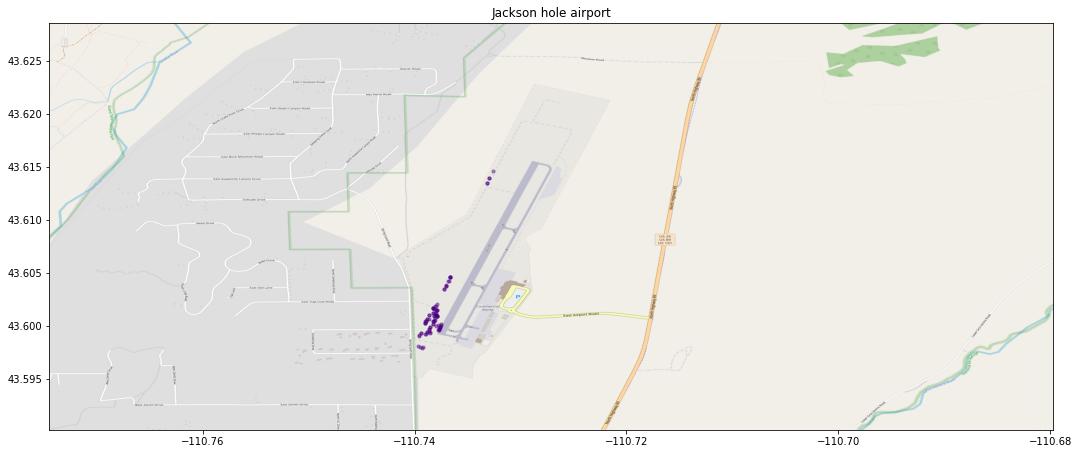

In [ ]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (18,18))
ax.scatter(gdf_jacksonhole_airport['centroids'][:].x.tolist(), gdf_jacksonhole_airport['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=10)
ax.set_title('Jackson hole airport')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

In [ ]:
gdf_jacksonhole_airport.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## NumPy 2D Histogram
returns
- 2d tensor with histogram bin count by x,y
- x value bins based on bin input (xn-x0)/bins
- y value bins based on bin input (yn-y0)/bins

In [ ]:
gdf_jacksonhole_airport.total_bounds

array([-110.73981219,   43.59788064, -110.73249657,   43.61480404])

In [ ]:
import numpy as np

hgram, x, y = np.histogram2d(gdf_jacksonhole_airport['centroids'].x, gdf_jacksonhole_airport['centroids'].y, bins=10)

In [ ]:
hgram

array([[ 8.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 33., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  4.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]])

In [ ]:
x

array([-110.7397035 , -110.7389951 , -110.7382867 , -110.7375783 ,
       -110.73686991, -110.73616151, -110.73545311, -110.73474471,
       -110.73403632, -110.73332792, -110.73261952])

In [ ]:
x[0], y[0]

(-110.73970349551269, 43.59796549131294)

In [ ]:
hgram[0,0]

8.0

In [ ]:
gdf_jacksonhole_airport['centroids'].iloc[25].y

43.60029377208031

In [ ]:
gdf_rp_airport = gpd.GeoDataFrame(hgram)

In [ ]:
gdf_rp_airport

,0,1,2,3,4,5,6,7,8,9
0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,33.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
gdf_rp_airport.iloc[0,0]

8.0

## GeoPandas

In [ ]:
# https://geojson.io/#map=14/43.6066/-110.7376

gdf_area  = gpd.read_file('map.geojson')

#### Either use
- predifined geocoords around airport
- or distribution of points
#### Total bounds from 1 of the 2 spatial structures above to form the grid

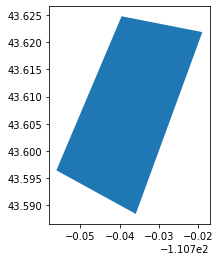

In [ ]:
gdf_area.plot()

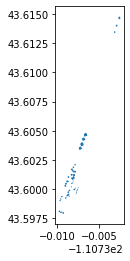

In [ ]:
gdf_jacksonhole_airport.plot()

## Plot geodataframe polygon in matplotlib
https://www.tutorialspoint.com/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib

In [ ]:
x,y = gdf_area['geometry'][0].exterior.xy

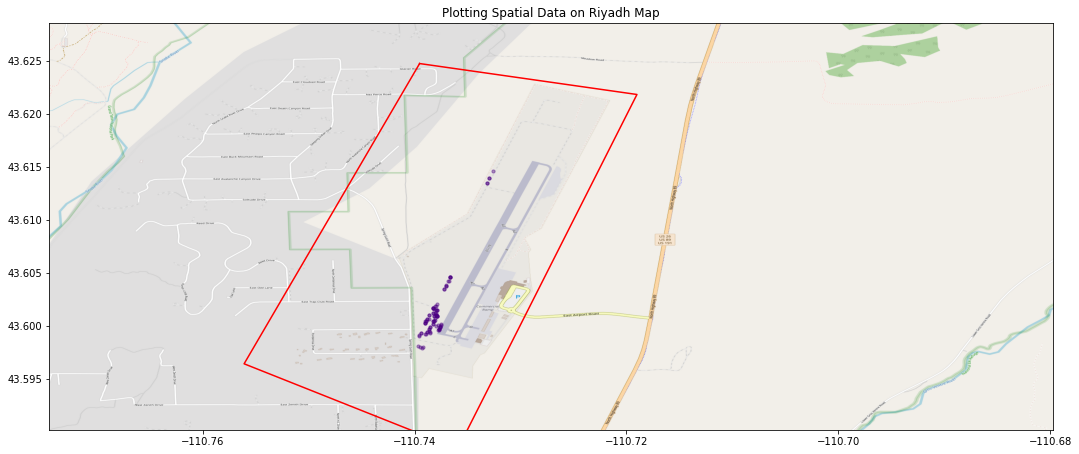

In [ ]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (18,18))

ax.scatter(gdf_jacksonhole_airport['centroids'][:].x.tolist(), gdf_jacksonhole_airport['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=10)

# New from above polygon
ax.plot(x, y, c="red")

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

In [ ]:
BOXES = 32
a, b, c, d = gdf_area.total_bounds


gdf_grid = gpd.GeoDataFrame(
    geometry=[
        shapely.geometry.box(minx, miny, maxx, maxy)
        for minx, maxx in zip(np.linspace(a, c, BOXES), np.linspace(a, c, BOXES)[1:])
        for miny, maxy in zip(np.linspace(b, d, BOXES), np.linspace(b, d, BOXES)[1:])
    ],
    crs="epsg:4326",
)

# remove grid boxes created outside actual geometry
gdf_grid = gdf_grid.sjoin(gdf_area).drop(columns="index_right")

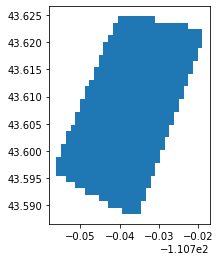

In [ ]:
gdf_grid.plot()

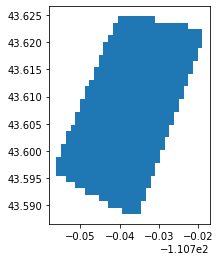

In [ ]:
# use ax = plot to add to matplotlib plot
# from article below

ax = gdf_grid.plot()

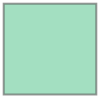

In [ ]:
gdf_grid.iloc[0]['geometry']

https://james-brennan.github.io/posts/fast_gridding_geopandas/

(-110.74017797329412,
 -110.7321307888041,
 43.59703446746061,
 43.615650210570436)

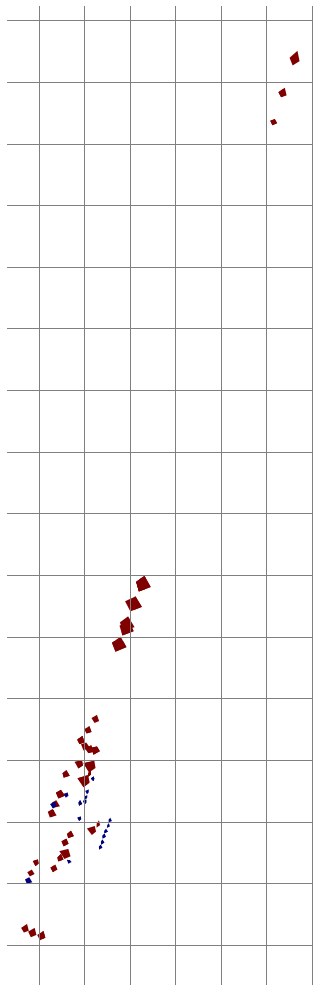

In [ ]:
ax = gdf_jacksonhole_airport.plot(markersize=.1, figsize=(12, 18), column='role_id', cmap='jet')
plt.autoscale(False)
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [ ]:
# image boundaries left, right, bottom, top
#bbox = (-110.7511, -110.7109, 43.6011, 43.6200)
# for ruh_m = plt.imread('map_zoomed.png')

# changed to ruh_m = plt.imread('map.png') below

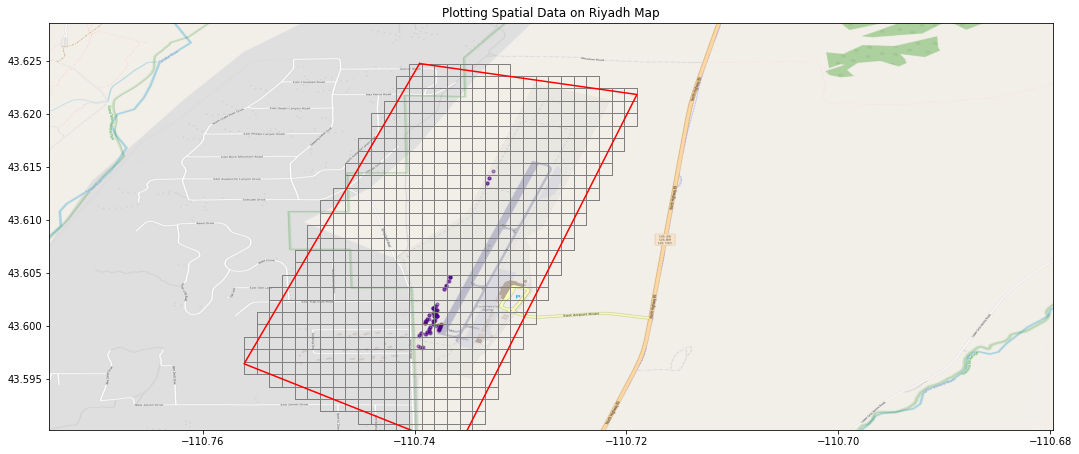

In [ ]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (18,18))

ax.scatter(gdf_jacksonhole_airport['centroids'][:].x.tolist(), gdf_jacksonhole_airport['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=10)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

In [ ]:
gdf_jacksonhole_airport.describe()

,loc_id,role_id,is_plane,num_engines,num_tail_fins,length,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area
count,93.0,93.000000,93.0,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.0,93.0,93.000000,93.000000,93.000000
mean,103.0,1.688172,1.0,1.537634,1.0,16.664343,17.894512,177.935788,1.849462,1.0,0.0,0.897754,0.344086,157.489450
std,0.0,0.465751,0.0,0.581586,0.0,8.571989,7.248625,166.237688,0.674798,0.0,0.0,0.213498,0.477644,151.522772
min,103.0,1.000000,1.0,0.000000,1.0,6.351193,9.357965,33.324035,1.000000,1.0,0.0,0.274456,0.000000,11.398348
25%,103.0,1.000000,1.0,1.000000,1.0,8.044590,11.847803,50.378729,1.000000,1.0,0.0,0.967268,0.000000,43.957459
50%,103.0,2.000000,1.0,2.000000,1.0,15.809556,16.787652,131.640517,2.000000,1.0,0.0,1.000000,0.000000,117.186592
75%,103.0,2.000000,1.0,2.000000,1.0,20.311451,19.026045,191.028886,2.000000,1.0,0.0,1.000000,1.000000,188.658004
max,103.0,2.000000,1.0,2.000000,1.0,37.475511,35.042539,628.656538,3.000000,1.0,0.0,1.000000,1.000000,628.656538


In [ ]:
gdf_jacksonhole_airport.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   loc_id              93 non-null     int64   
 1   cat_id              93 non-null     object  
 2   location            93 non-null     object  
 3   role                93 non-null     object  
 4   role_id             93 non-null     int64   
 5   is_plane            93 non-null     int64   
 6   num_engines         93 non-null     int64   
 7   propulsion          93 non-null     object  
 8   canards             93 non-null     object  
 9   num_tail_fins       93 non-null     int64   
 10  wing_position       93 non-null     object  
 11  wing_type           93 non-null     object  
 12  length              93 non-null     float64 
 13  wingspan            93 non-null     float64 
 14  area                93 non-null     float64 
 15  faa_wingspan_class  93 non-null   

In [ ]:
gdf_jacksonhole_airport['role_id']

0     2
1     2
2     2
3     2
4     2
     ..
88    2
89    2
90    1
91    2
92    2
Name: role_id, Length: 93, dtype: int64

In [ ]:
print(gdf_jacksonhole_airport[['role_id','role']][10:20])

    role_id                            role
10        2  Medium Civil Transport/Utility
11        2  Medium Civil Transport/Utility
12        2  Medium Civil Transport/Utility
13        1   Small Civil Transport/Utility
14        1   Small Civil Transport/Utility
15        2  Medium Civil Transport/Utility
16        2  Medium Civil Transport/Utility
17        1   Small Civil Transport/Utility
18        1   Small Civil Transport/Utility
19        1   Small Civil Transport/Utility


In [ ]:
gdf_grid.head(1)

,geometry
6,"POLYGON ((-110.75490 43.59545, -110.75490 43.5..."


In [ ]:
join_left_df = gdf_jacksonhole_airport.sjoin(gdf_grid, how="left")
join_right_df = gdf_jacksonhole_airport.sjoin(gdf_grid, how="right")

In [ ]:
join_left_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 115 entries, 0 to 92
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   loc_id              115 non-null    int64   
 1   cat_id              115 non-null    object  
 2   location            115 non-null    object  
 3   role                115 non-null    object  
 4   role_id             115 non-null    int64   
 5   is_plane            115 non-null    int64   
 6   num_engines         115 non-null    int64   
 7   propulsion          115 non-null    object  
 8   canards             115 non-null    object  
 9   num_tail_fins       115 non-null    int64   
 10  wing_position       115 non-null    object  
 11  wing_type           115 non-null    object  
 12  length              115 non-null    float64 
 13  wingspan            115 non-null    float64 
 14  area                115 non-null    float64 
 15  faa_wingspan_class  115 non-null 

In [ ]:
join_right_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 673 entries, 6 to 958
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index_left          115 non-null    float64 
 1   loc_id              115 non-null    float64 
 2   cat_id              115 non-null    object  
 3   location            115 non-null    object  
 4   role                115 non-null    object  
 5   role_id             115 non-null    float64 
 6   is_plane            115 non-null    float64 
 7   num_engines         115 non-null    float64 
 8   propulsion          115 non-null    object  
 9   canards             115 non-null    object  
 10  num_tail_fins       115 non-null    float64 
 11  wing_position       115 non-null    object  
 12  wing_type           115 non-null    object  
 13  length              115 non-null    float64 
 14  wingspan            115 non-null    float64 
 15  area                115 non-null

In [ ]:
gdf_grid.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 572 entries, 6 to 958
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  572 non-null    geometry
dtypes: geometry(1)
memory usage: 8.9 KB


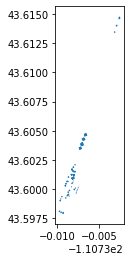

In [ ]:
join_left_df.plot()

In [ ]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

(-110.7745, -110.6797, 43.5902, 43.6286)

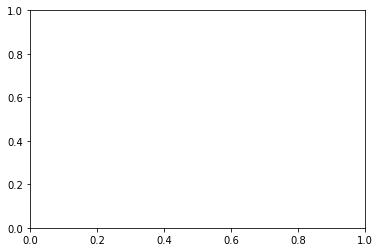

In [ ]:
#ax = join_left_df.plot()
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('nybb'))
world.to_crs(join_left_df.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

## Merge rareplanes points with grid created over geo outline

In [ ]:
# comment out to use polygons, because polygons are in the geometry column
# Or assign geometry column to centroids for points
gdf_jacksonhole_airport['geometry'] = gdf_jacksonhole_airport['centroids']

In [ ]:
merged = gpd.sjoin(gdf_jacksonhole_airport, gdf_grid, how='left', op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [ ]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   loc_id              93 non-null     int64   
 1   cat_id              93 non-null     object  
 2   location            93 non-null     object  
 3   role                93 non-null     object  
 4   role_id             93 non-null     int64   
 5   is_plane            93 non-null     int64   
 6   num_engines         93 non-null     int64   
 7   propulsion          93 non-null     object  
 8   canards             93 non-null     object  
 9   num_tail_fins       93 non-null     int64   
 10  wing_position       93 non-null     object  
 11  wing_type           93 non-null     object  
 12  length              93 non-null     float64 
 13  wingspan            93 non-null     float64 
 14  area                93 non-null     float64 
 15  faa_wingspan_class  93 non-null   

In [ ]:
merged['numn_planes'] = 1

In [ ]:
dissolve = merged.dissolve(by="index_right", aggfunc="count")

In [ ]:
gdf_grid.loc[dissolve.index, 'numn_planes'] = dissolve.numn_planes.values

(-110.74096150552072,
 -110.73175159577399,
 43.59691401436884,
 43.61626552024129)

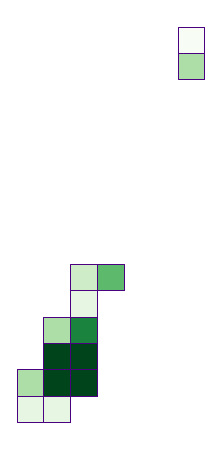

In [ ]:
ax = gdf_grid.plot(column='numn_planes', figsize=(12, 8), cmap='Greens', vmax=10, edgecolor="indigo")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(gdf_grid.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

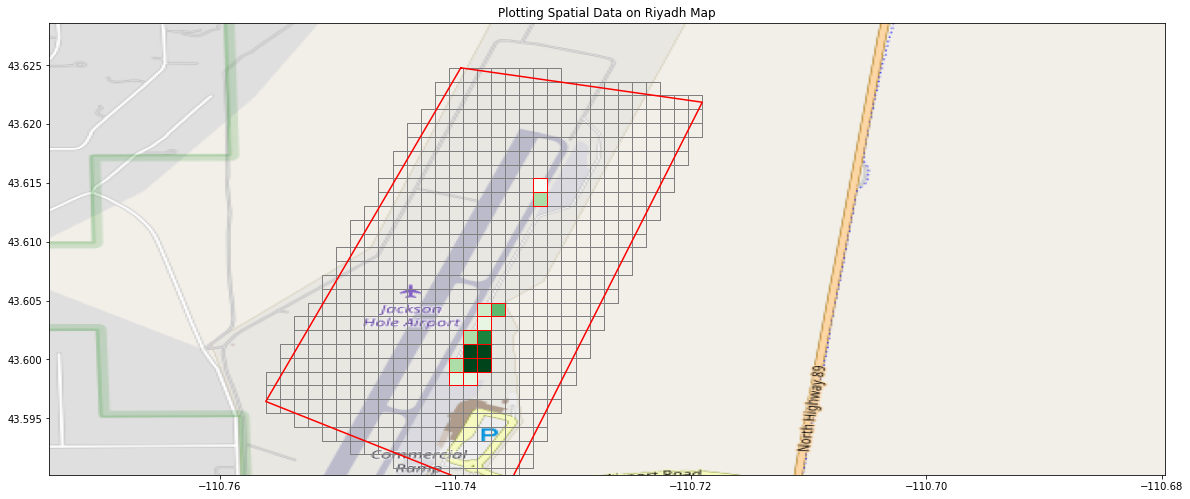

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(gdf_jacksonhole_airport['centroids'][:].x.tolist(), gdf_jacksonhole_airport['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=10)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
gdf_grid.plot(ax=ax, column='numn_planes', figsize=(12, 8), cmap='Greens', vmax=10, edgecolor="red")


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

## Remove grid from geodataframe that does not have counts for planes

In [ ]:
gdf_grid_new = gdf_grid.copy()

In [ ]:
# remove grid boxes created outside actual geometry
gdf_grid = gdf_grid_new.sjoin(gdf_grid).drop(columns="index_right")

In [ ]:
gdf_grid_new.head(2)

,geometry,numn_planes,role_id_left,role_id
411,"POLYGON ((-110.73935 43.59779, -110.73935 43.5...",2.0,NaN,2.0
412,"POLYGON ((-110.73935 43.59897, -110.73935 43.6...",4.0,1.0,3.0


In [ ]:
gdf_grid_new = gdf_grid_new[gdf_grid_new['numn_planes'].notna()]

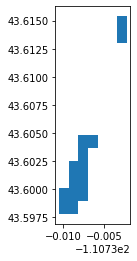

In [ ]:
gdf_grid_new.plot()

In [ ]:
gdf_grid_new.head(2)

## Square vs hex fishnet grids
in R but a good example
https://strimas.com/post/hexagonal-grids/

## Multiple class bins

In [ ]:
len(gdf_jacksonhole_airport[gdf_jacksonhole_airport['role_id'] == 1])

29

In [ ]:
len(gdf_jacksonhole_airport[gdf_jacksonhole_airport['role_id'] == 2])

64

In [ ]:
jcksnhle_id_1 = gdf_jacksonhole_airport[gdf_jacksonhole_airport['role_id'] == 1]

In [ ]:
jcksnhle_id_2 = gdf_jacksonhole_airport[gdf_jacksonhole_airport['role_id'] == 2]

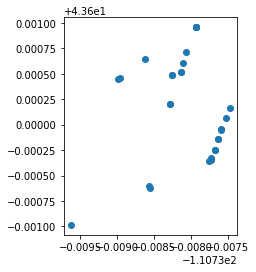

In [ ]:
jcksnhle_id_1.plot()

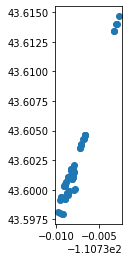

In [ ]:
jcksnhle_id_2.plot()

#### centroids have already been created

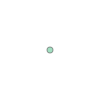

In [ ]:
jcksnhle_id_2.iloc[1]['centroids']

In [ ]:
jcksnhle_id_1.head(1)

,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,num_tail_fins,...,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,geometry,centroids
13,103,10400100080A3000,"Jackson Hole Airport, East Airport Road, Teton...",Small Civil Transport/Utility,1,1,1,propeller,no,1,...,10.530302,41.530668,1,1,0,0.274456,1,11.398348,POINT (-110.73775 43.59964),POINT (-110.73775 43.59964)


In [ ]:
merged = gpd.sjoin(jcksnhle_id_1, gdf_grid, how='left', op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [ ]:
dissolve = merged.dissolve(by="index_right", aggfunc="count")

In [ ]:
dissolve

,geometry,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,...,wingspan,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,centroids,numn_planes
index_right,,,,,,,,,,,,,,,,,,,,,
412,POINT (-110.73962 43.59902),1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
443,"MULTIPOINT (-110.73856 43.59940, -110.73855 43...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
444,"MULTIPOINT (-110.73898 43.60045, -110.73896 43...",7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
474,"MULTIPOINT (-110.73775 43.59964, -110.73773 43...",10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
475,"MULTIPOINT (-110.73814 43.60052, -110.73811 43...",9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
gdf_grid.loc[dissolve.index, 'role_id_left'] = dissolve.role_id.values

(-110.74072228708573,
 -110.73677518290857,
 43.598849164956086,
 43.60142936573909)

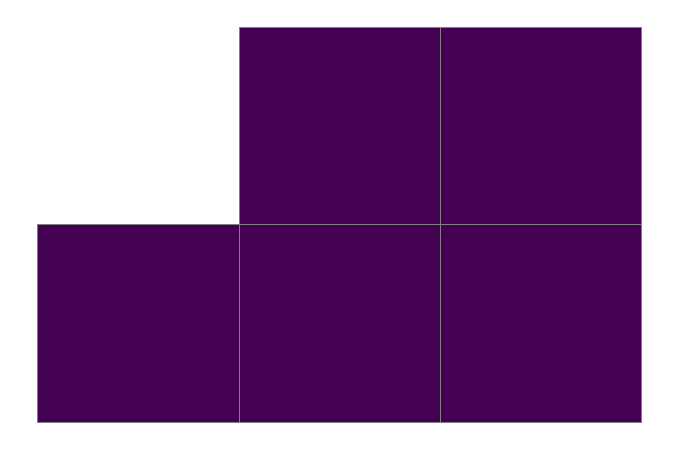

In [ ]:
ax = gdf_grid.plot(column='role_id_left', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(gdf_grid.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

In [ ]:
merged = gpd.sjoin(jcksnhle_id_2, gdf_grid, how='left', op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [ ]:
dissolve = merged.dissolve(by="index_right", aggfunc="count")

In [ ]:
dissolve

,geometry,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,...,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,centroids,numn_planes,role_id_left
index_right,,,,,,,,,,,,,,,,,,,,,
411,"MULTIPOINT (-110.73970 43.59810, -110.73951 43...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
412,"MULTIPOINT (-110.73956 43.59916, -110.73942 43...",3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
442,"MULTIPOINT (-110.73928 43.59797, -110.73922 43...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
443,"MULTIPOINT (-110.73898 43.59924, -110.73895 43...",9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
444,"MULTIPOINT (-110.73901 43.60029, -110.73900 43...",12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
445,"MULTIPOINT (-110.73824 43.60168, -110.73824 43...",4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
474,"MULTIPOINT (-110.73795 43.59998, -110.73779 43...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
475,"MULTIPOINT (-110.73808 43.60120, -110.73802 43...",6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
476,"MULTIPOINT (-110.73813 43.60157, -110.73806 43...",8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,0


In [ ]:
dissolve.head(1)

,geometry,loc_id,cat_id,location,role,role_id,is_plane,num_engines,propulsion,canards,...,area,faa_wingspan_class,Public_Train,Public_Test,partialDec,truncated,new_area,centroids,numn_planes,role_id_left
index_right,,,,,,,,,,,,,,,,,,,,,
411,"MULTIPOINT (-110.73970 43.59810, -110.73951 43...",2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0


In [ ]:
gdf_grid.loc[dissolve.index, 'role_id'] = dissolve.role_id.values

(-110.74096150552072,
 -110.73175159577399,
 43.59691401436884,
 43.61626552024129)

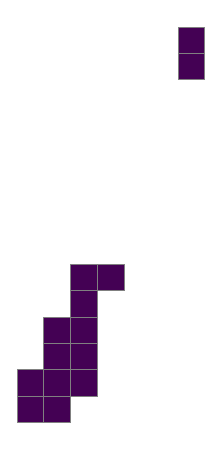

In [ ]:
ax = gdf_grid.plot(column='role_id', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")
plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs(gdf_grid.crs).plot(ax=ax, color='none', edgecolor='black')
ax.axis('off')

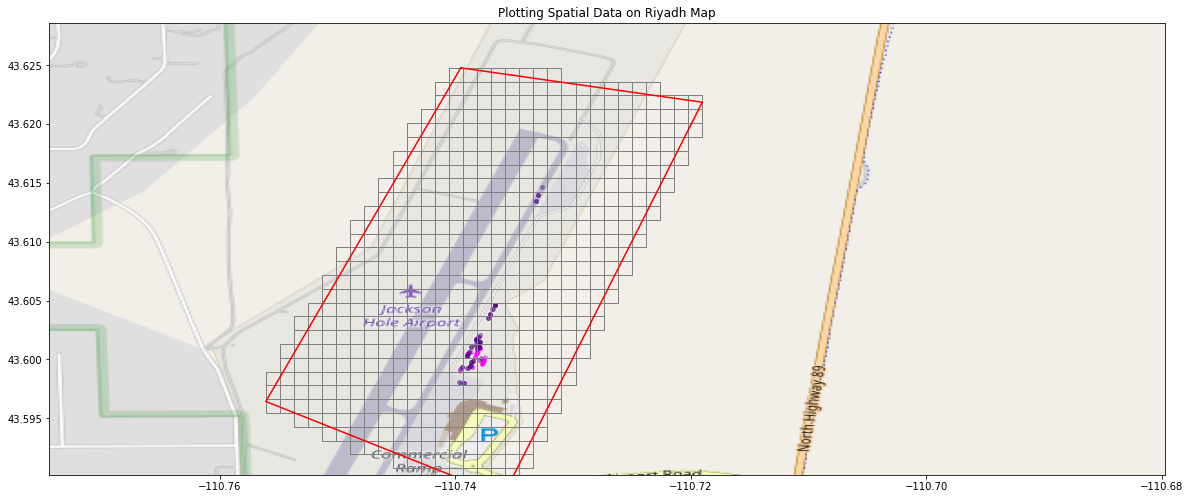

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(jcksnhle_id_1['centroids'][:].x.tolist(), jcksnhle_id_1['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='magenta', s=15)
ax.scatter(jcksnhle_id_2['centroids'][:].x.tolist(), jcksnhle_id_2['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=15)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
# BIN GRID COMMENTED OUT
#gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

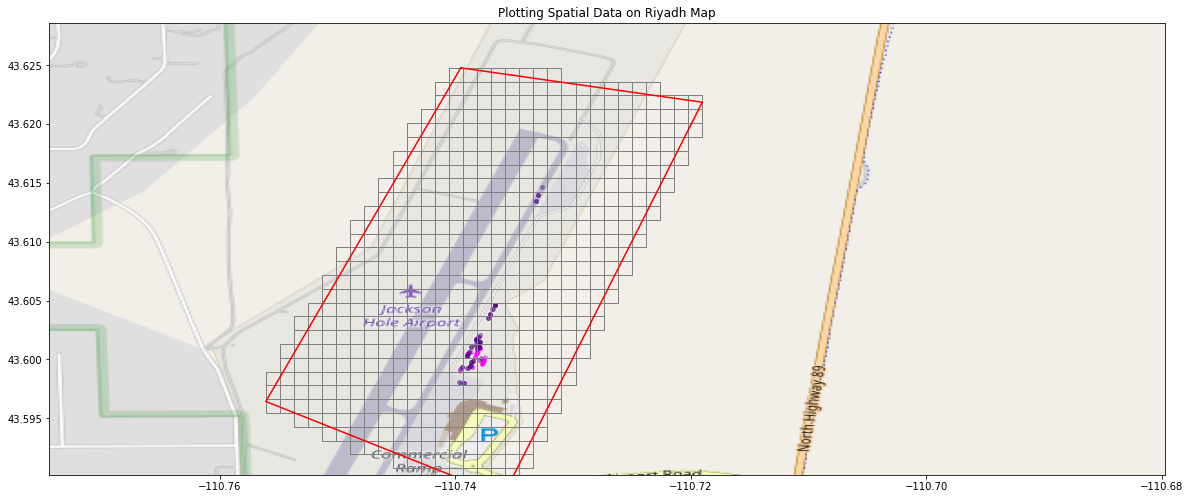

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(jcksnhle_id_1['centroids'][:].x.tolist(), jcksnhle_id_1['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='magenta', s=15)
ax.scatter(jcksnhle_id_2['centroids'][:].x.tolist(), jcksnhle_id_2['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=15)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
#gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='RdBu', vmax=2, edgecolor="grey")


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

# Chane vmax to vary colors in the line below
- gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='magma', vmax=2, edgecolor="grey")

- 2 in this instance will show the difference between the two classes

# Need to create seperate dataframes

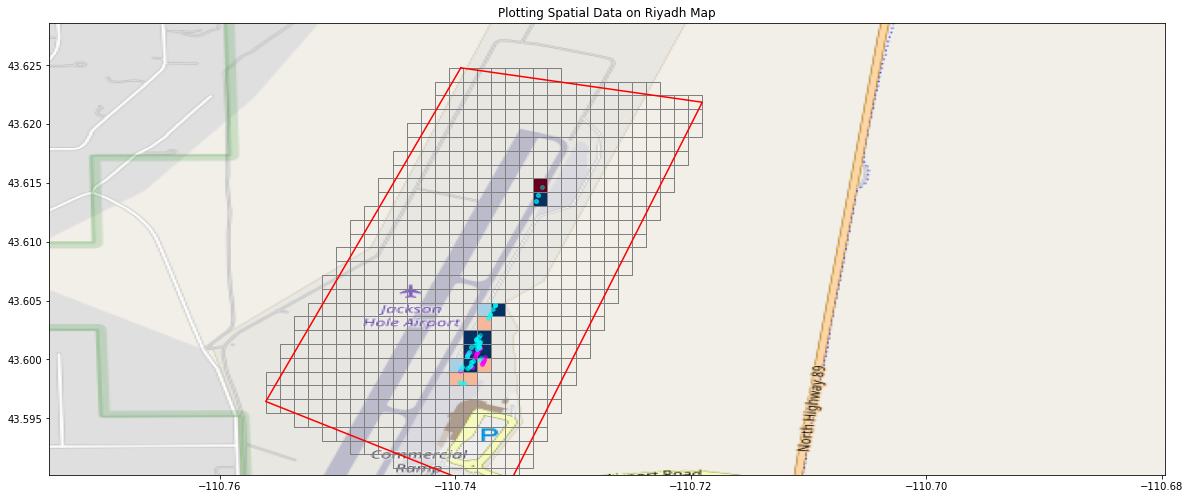

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))


# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='RdBu', vmax=4, edgecolor="grey")

ax.scatter(jcksnhle_id_1['centroids'][:].x.tolist(), jcksnhle_id_1['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='magenta', s=15)
ax.scatter(jcksnhle_id_2['centroids'][:].x.tolist(), jcksnhle_id_2['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='cyan', s=15)


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

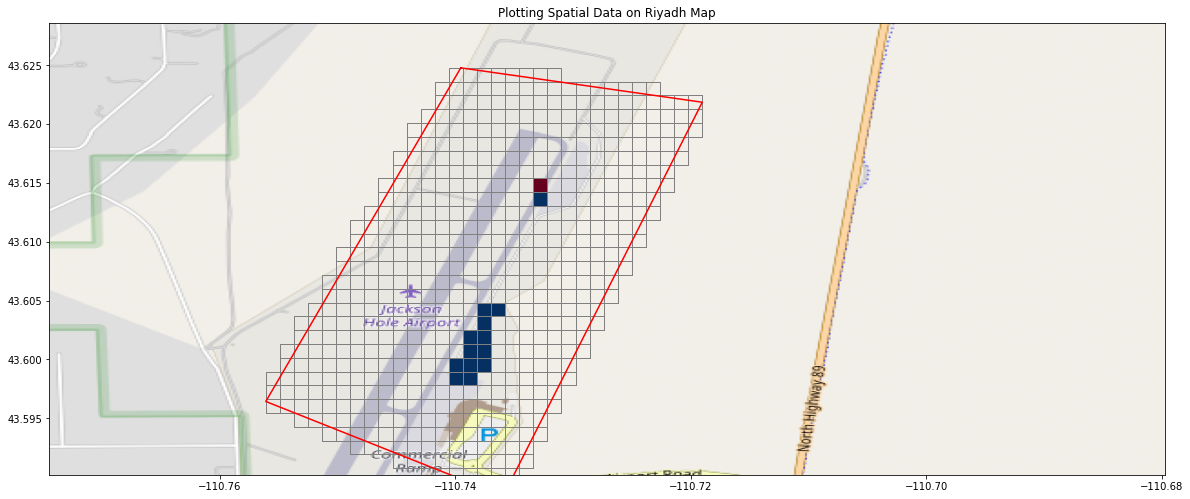

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(jcksnhle_id_1['centroids'][:].x.tolist(), jcksnhle_id_1['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='magenta', s=15)
ax.scatter(jcksnhle_id_2['centroids'][:].x.tolist(), jcksnhle_id_2['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=15)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='RdBu', vmax=2, edgecolor="grey")


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

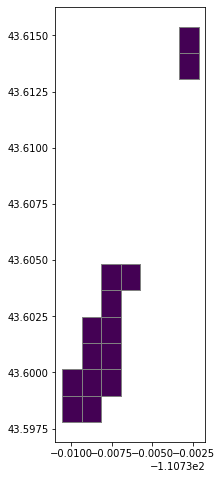

In [ ]:
gdf_grid.plot(column='role_id', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")

## Create multiple grid plots for different object counts

In [ ]:
gdf_grid_NEW = gdf_grid.copy()

In [ ]:
gdf_grid_NEW = gdf_grid_NEW.drop(gdf_grid_NEW.index[list(range(300))])

In [ ]:
gdf_grid_NEW.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 272 entries, 494 to 958
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      272 non-null    geometry
 1   numn_planes   3 non-null      float64 
 2   role_id_left  0 non-null      float64 
 3   role_id       3 non-null      float64 
dtypes: float64(3), geometry(1)
memory usage: 10.6 KB


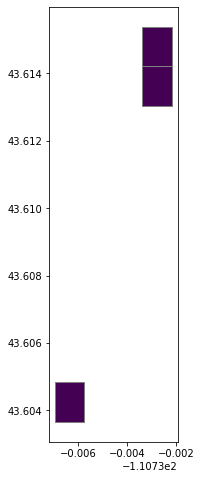

In [ ]:
gdf_grid_NEW.plot(column='role_id', figsize=(12, 8), cmap='viridis', vmax=5000, edgecolor="grey")

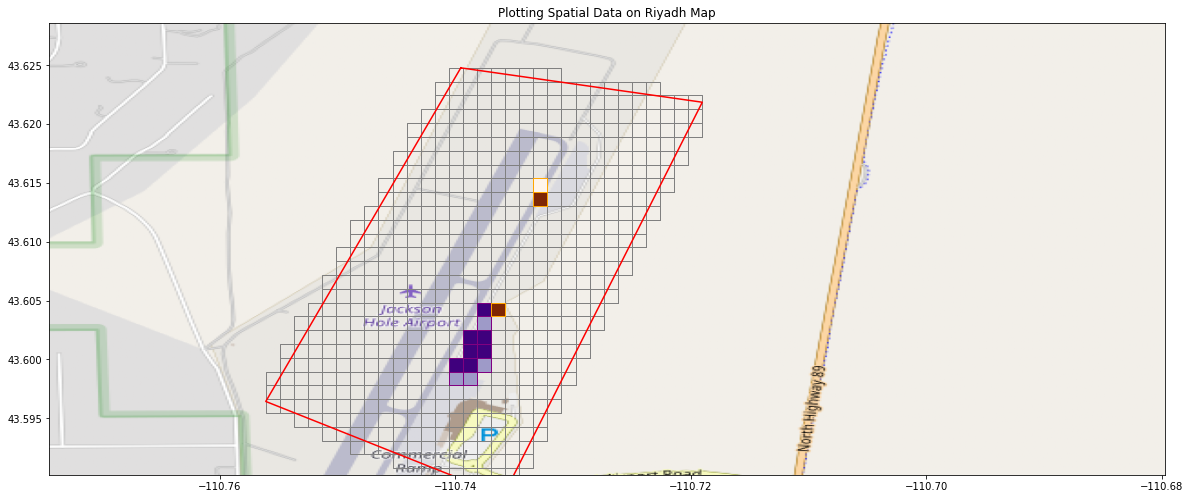

In [ ]:
ruh_m = plt.imread('map_zoomed.png')

fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(jcksnhle_id_1['centroids'][:].x.tolist(), jcksnhle_id_1['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='magenta', s=15)
ax.scatter(jcksnhle_id_2['centroids'][:].x.tolist(), jcksnhle_id_2['centroids'][:].y.tolist(), zorder=1, alpha= 0.4, c='indigo', s=15)

# New from above polygon
ax.plot(x, y, c="red")

# from directly above learned plotting style
gdf_grid.plot(ax=ax, facecolor="none", edgecolor='grey')

# add spatial grid histogram layer From cell directly above
gdf_grid.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='Purples', vmax=3, edgecolor="purple")
gdf_grid_NEW.plot(ax=ax, column='role_id', figsize=(12, 8), cmap='Oranges', vmax=3, edgecolor="orange")


ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(ruh_m, zorder=0, extent = bbox, aspect= 'equal')

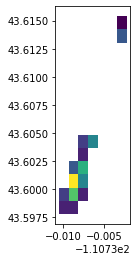

In [ ]:
x = gdf_grid.plot(column='role_id')

## To json
https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_json.html

In [ ]:
air_grid_geoj = gdf_grid.to_json()

In [ ]:
path = './'
gdf_grid.to_file(path, driver="GeoJSON")  

IsADirectoryError: ignored

## Add GeoJson to Folium map
https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays

https://gis.stackexchange.com/questions/368657/trying-to-export-shapefile-attributetable-to-json-using-geopandas-without-the-ge

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [ ]:
lat, lon = 43.59703446746061, -110.74017797329412

In [ ]:
import folium
from folium import plugins

map = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

In [ ]:
folium.GeoJson(air_grid_geoj, name="geojson").add_to(map)

In [ ]:
map

In [ ]:
map_2 = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

folium.Choropleth(air_grid_geoj,                                # geo data
                  #data=air_grid_geoj,                           # data
                  #key_on='feature.properties.statename', # feature.properties.key
                  columns='role_id',   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  #legend_name='Population')
                  ).add_to(map_2)

In [ ]:
map_2

In [ ]:
map_2 = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

folium.Choropleth(dissolve,                                # geo data
                  #data=air_grid_geoj,                           # data
                  #key_on='feature.properties.statename', # feature.properties.key
                  columns='role_id',   # [key, value]
                  fill_color='RdPu',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  #legend_name='Population')
                  ).add_to(map_2)

In [ ]:
map_2

In [ ]:
map = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

In [ ]:
folium.GeoJson(dissolve, name="geojson").add_to(map)

In [ ]:
map

In [ ]:
map = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

In [ ]:
folium.GeoJson(gdf_grid_new, name="geojson").add_to(map) # change to map 2 to combine grid plus chloropleth

In [ ]:
map

In [ ]:
gdf_grid_new.head(2)

,geometry,numn_planes,role_id_left,role_id
411,"POLYGON ((-110.73935 43.59779, -110.73935 43.5...",2.0,NaN,2.0
412,"POLYGON ((-110.73935 43.59897, -110.73935 43.6...",4.0,1.0,3.0


In [ ]:
map_2 = folium.Map(location = [lat, lon], tiles='Stamen Terrain', zoom_start = 14)

folium.Choropleth(gdf_grid_new,                                # geo data
                  #data=air_grid_geoj,                           # data
                  #key_on='feature.properties.statename', # feature.properties.key
                  columns='numn_planes',   # [key, value]
                  fill_color='Purple',                     # cmap
                  line_weight=0.1,                       # line wight (of the border)
                  line_opacity=0.5,                      # line opacity (of the border)
                  #legend_name='Population')
                  ).add_to(map_2)

In [ ]:
map_2

## GeoDataframe to NumPy array

In [ ]:
gdf_grid_new.head(2)

,geometry,numn_planes,role_id_left,role_id
411,"POLYGON ((-110.73935 43.59779, -110.73935 43.5...",2.0,NaN,2.0
412,"POLYGON ((-110.73935 43.59897, -110.73935 43.6...",4.0,1.0,3.0


In [ ]:
gdf_grid_new['numn_planes'].to_numpy().shape

(14,)

In [ ]:
gdf_grid.head(2)

,geometry,numn_planes,role_id_left,role_id
6,"POLYGON ((-110.75490 43.59545, -110.75490 43.5...",NaN,NaN,NaN
7,"POLYGON ((-110.75490 43.59662, -110.75490 43.5...",NaN,NaN,NaN


In [ ]:
gdf_grid.shape

(572, 4)

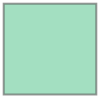

In [ ]:
gdf_grid.iloc[8]['geometry']

## Extract a subset of the grid

In [ ]:
grid_row = gdf_grid[:32]

In [ ]:
grid_row.head(2)

,geometry,numn_planes,role_id_left,role_id
6,"POLYGON ((-110.75490 43.59545, -110.75490 43.5...",NaN,NaN,NaN
7,"POLYGON ((-110.75490 43.59662, -110.75490 43.5...",NaN,NaN,NaN


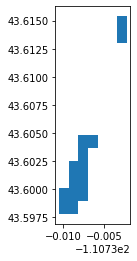

In [ ]:
gdf_grid_new[gdf_grid_new['numn_planes']>0].plot()

## replace nan plane counts with 0
https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe

In [ ]:
'''
import pandas as pd
import numpy as np

# for column
df['column'] = df['column'].replace(np.nan, 0)

# for whole dataframe
df = df.replace(np.nan, 0)

# inplace
df.replace(np.nan, 0, inplace=True)
'''

In [ ]:
gdf_grid_toNumpy = gdf_grid.copy()

In [ ]:
gdf_grid_toNumpy.shape

(572, 4)

In [ ]:
gdf_grid_toNumpy['numn_planes'].to_numpy().shape

(572,)

In [ ]:
gdf_grid_toNumpy['numn_planes'] = gdf_grid_toNumpy['numn_planes'].fillna(0)


In [ ]:
gdf_grid_toNumpy['numn_planes']

6      0.0
7      0.0
8      0.0
37     0.0
38     0.0
      ... 
926    0.0
927    0.0
956    0.0
957    0.0
958    0.0
Name: numn_planes, Length: 572, dtype: float64

In [ ]:
np_gdf_grid = gdf_grid_toNumpy['numn_planes'].to_numpy()

In [ ]:
np_gdf_grid.shape

(572,)

In [ ]:
count = 0
for el in np_gdf_grid:
  if count >= 32:
    count = 0
    print()
    continue

  print(el,end='')

  count+=1

0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.02.04.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.02.011.019.04.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.012.015.08.02.03.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.06.00.00.00.00.00.00.00.00.00.00.00.00.00.0
0.00.00.00.00.00.00.00.00.

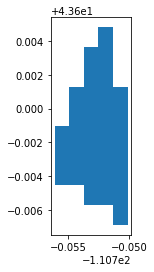

In [ ]:
grid_row.plot()

In [ ]:
grid_row = gdf_grid[:]

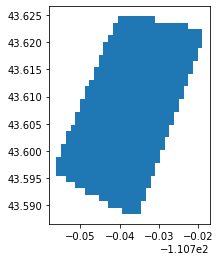

In [ ]:
grid_row.plot()

## Niave subset of the grid method

In [ ]:
list_gdf = []

count = 0
for el in gdf_grid['geometry']:
  if count>=32:
    break
  list_gdf.append(el)
  count+=1

In [ ]:
from geopandas.geodataframe import GeoDataFrame
grid_row = GeoDataFrame(list_gdf)

In [ ]:
grid_row

,0
0,geometry
1,geometry
2,geometry
3,geometry
4,geometry
5,geometry
6,geometry
7,geometry
8,geometry
9,geometry


In [ ]:
hgram, x, y = np.histogram2d(gdf_jacksonhole_airport['centroids'].x, gdf_jacksonhole_airport['centroids'].y, bins=32)

In [ ]:
x

array([-110.7397035 , -110.73948212, -110.73926075, -110.73903937,
       -110.738818  , -110.73859662, -110.73837525, -110.73815388,
       -110.7379325 , -110.73771113, -110.73748975, -110.73726838,
       -110.73704701, -110.73682563, -110.73660426, -110.73638288,
       -110.73616151, -110.73594013, -110.73571876, -110.73549739,
       -110.73527601, -110.73505464, -110.73483326, -110.73461189,
       -110.73439052, -110.73416914, -110.73394777, -110.73372639,
       -110.73350502, -110.73328364, -110.73306227, -110.7328409 ,
       -110.73261952])

In [ ]:
np.where(x > -110.73328364)

(array([30, 31, 32]),)

In [ ]:
np.where(x < -110.73328364)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),)

In [ ]:
y.shape

(33,)

In [ ]:
hgram.shape

(32, 32)

In [ ]:
import matplotlib.pyplot as plt

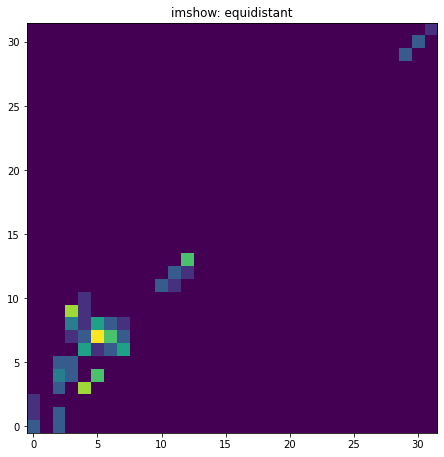

In [ ]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(131)
ax.set_title('imshow: equidistant')
im = plt.imshow(hgram, interpolation='nearest', origin='low')

In [ ]:
hgram

array([[2., 0., 2., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])